# **6.1 1차원 입력 2클래스 분류**

회귀 문제는 목표 데이터가 연속된 수치였지만, 분류 문제에서 목표데이터는 '클래스' 입니다. 즉 카테고리를 말하며, 확률의 개념을 도입해 설명할 것입니다.
가장 먼저 입력정보가 1차원이고, 분류할 클래스가 두 가지인 경우를 생각해봅시다.

# **6.1.1 문제 설정**

1차원의 '입력 변수'를 $X_n$ 으로 나타내고, 그 '목표변수'를 $t_n$ 으로 할 때, n은 데이터의 인덱스 이고, $t_0은$ 0 또는 1만 갖는 변수로 클래스 0이면 0, 클래스 1이면 1을 갖습니다. $t_n$ 을 클래스, 카테고리, 라벨이라고 부른다.

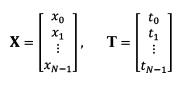

output을 행렬로 하기 위해 **t** 대신 **T**로 나타낼 수 있다. 예를 들어 곤충 N 마리의 데이터를 생각해 볼 때, 각각의 무게를 $x_n$ 으로 각 성별을 $t_n$ 으로 나타낸다. $t_n 은$ 0 또는 1을 갖는 변수로, 0이면, 암컷, 1이면 수컷을 나타내고 있다. 이 때, 이 데이터를 바탕으로 무게를 통한 성별을 예측하는 모델을 만드는 것이 최종 목표다.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(seed = 0) #난수를 고정
X_min = 0
X_max = 2.5
X_n = 30
X_col = ['cornflowerblue', 'gray']
X = np.zeros(X_n)
T = np.zeros(X_n, dtype = np.uint8)
Dist_s = [0.4, 0.8]
Dist_w = [0.8, 1.6]
Pi = 0.5
for n in range(X_n):
    wk = np.random.rand()
    T[n] = 0 * (wk < Pi) + 1 * (wk >= Pi)
    X[n] = np.random.rand() * Dist_w[T[n]] + Dist_s[T[n]]

print('X=' + str(np.round(X, 2)))
print('T=' + str(T))

X=[1.94 1.67 0.92 1.11 1.41 1.65 2.28 0.47 1.07 2.19 2.08 1.02 0.91 1.16
 1.46 1.02 0.85 0.89 1.79 1.89 0.75 0.9  1.87 0.5  0.69 1.5  0.96 0.53
 1.21 0.6 ]
T=[1 1 0 0 1 1 1 0 0 1 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 1 1 0 1 0]


수컷과 암컷을 확률적으로 결정한다. 암컷이 될 확률을 pi = 0.5로 하여, 무작위 결정한다.

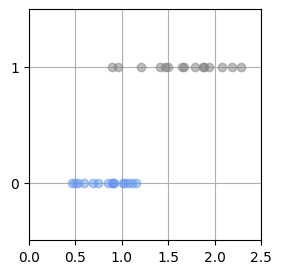

In [ ]:
def show_data1(x, t):
  K = np.max(t) + 1
  for k in range(K):
    plt.plot(x[t == k], t[t == k], X_col[k], alpha = 0.5, linestyle = 'none', marker = 'o')
    plt.grid(True)
    plt.ylim(-.5, 1.5)
    plt.xlim(X_min, X_max)
    plt.yticks([0, 1])

flg = plt.figure(figsize = (3, 3))
show_data1(X, T)
plt.show()

이제 암컷과 수컷을 분리해볼텐데, 방법은 경게선을 정하는 방법으로 우리는 풀어 볼 것이다. 결정 경계를 만들고 크면, 수컷, 작으면 암컷을 취하는 방법을 사용할 수 있다. 가장 간단하게 5장에서 처럼 선형 방정식을 이용해 결정경계를 정한다고 가정해보자, 클래스를 0과 1로 구분해 분포를 직선에 맞추는 방법을 통해 한다고 하면 정확한 분류가 불가능 할 것이다.


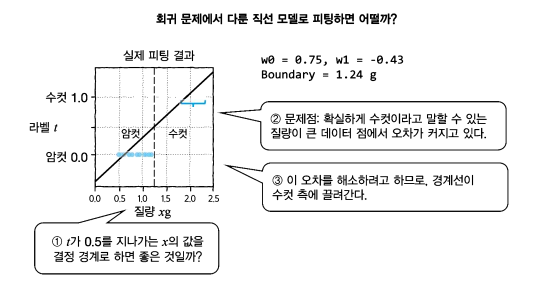

# **6.1.2 확률로 나타내는 클래스 분류**

선형 모델을 분류 문제에 그대로 적용하는 것은 좋지 못한 선택이었다. 이번에는 확률에 세계로 들어가보자, 지금 까지는 인공 데티어를 통했기 때문에, 데이터의 분포를 정확하게 알 수 있었고 그래서, 암컷과 수컷을 구분을 단언할 수 있었지만, 100% 예측하는 것은 불가능 하다. 하지만, 전혀 예측을 할 수 없다는 것은 아니고, 수컷일 확률이 1/3 처럼 모호한 확률을 포함하여 예측하는 것은 가능하다.

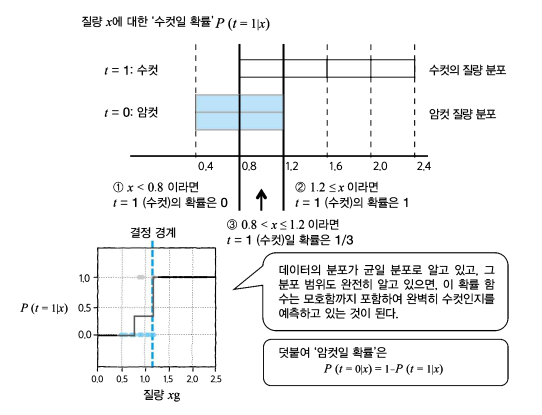

0.8~1.2 사이에서 수컷일 확률은 1/3 1.2 이상에서 수컷일 확률은 1 이 됩니다. 이 x에 대해서 t=1 일 확률은 조건부 확률을 이용해 $P(t=1|x)$ 로 나타낼 수 있습니다. 이에 대한 모든 확률에 대해 plot 하게 되면, 그림 6.4의 좌측 하단의 그래프 처럼 계단식의 함수를 만들어 낼 수 있다. 이 예에서는 1.2를 기준으로 결정 경계를 만들 수 밖에 없다. 좌측으로 가면 암컷일 확률이 커지고 우측으로 가면 수컷일 확률이 커지기 때문에다. 사실 실제 분포는 귀하의 데이터로 부터 추정하지 않으면 안 된다. p.232 이게 무슨 말일까. 추정하라는 걸까 말라는 걸까

# **6.1.3 최대가능도법**

앞의 예에서 0.8 < x <= 1.2 일 때, P(t=1|x) = 1/3 임을 실제 분포에서 해석적인 방법으로 도출해 사용했습니다. 하지만, 실제로 이 값은 데이터들로 부터 추정해야 합니다.

예를 들어 x가 0.8 < x <= 1.2 범위에 있는 t에 주목해, 처음 3회는 t = 0 이며, 4회째는 t = 1 이었다고 하면, 이 정보에서 0.8 < x <= 1.2 P(t=1|x) 를 추정하자.
위 같은 단순한 모델을 고려해, w에서 t=1을 생성하는 모델을 가정하자. w의 범위는 0~1 이다. 이 모델이 T = 0, 0, 0, 1 이라는 데이터를 생성했다 가정해, 이 정보를 통해 가장 타당한 w를 추정하는 문제를 고려합니다. 당연히 계산을 하면 1/4 지만, 일반적인 모든 경우에 대해 적용하기 위해서, 최대가능도법을 적용해서 생각해보자. T = 0, 0, 0, 1 이 생성될 확률을 생각하고, 이를 우도 라고 한다. w 가 0.1 경우의 우도를 찾으면, t = 1 일 확률이 0.1 이고 t = 0 일 확률이 0.9 임으로, 0.9 x 0.9 x 0.9 x 0.1 의 값은 0.0729다. 0.2라고 가정하면 0.1024 가 나온다. 만일 둘 중에 골라야 한다면 당연히 우도가 더 높은 0.2 쪽을 선택하는게 더 좋은 선택일 것이다.

즉 t 가 1이 될 확률은 W 반대로 t 가 0이 될 확률은 (1-w) 가 된다. 우리가 이제 최대치를 갖는 w가 가장 적절한 값이자, 추정치가 된다. 이것이 최대 가능도법이다. 이게 최대가 되는 w는 0.25가 될 것이다.

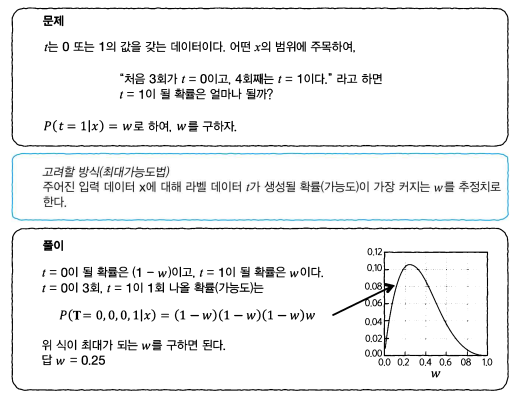

하지만 연속된 곱셈을 다루는 것은 매우 어렵기 때문에, 양 변에 로그를 취해서, 합으로 바꿉니다. 그렇다면 아래와 같은 식으로 나타낼 수 있다.

Screenshot from 2024-07-10 23-02-47.png

P를 최대로 만드는 w와, logP를 최대로 만드는 w는 바뀌지 않는다. 즉 logP를 최대로 하는 w를 구하면, 그 w도 P를 최대로 만들 것이다. 로그를 취한 가능도를 로그 가능도라고 부르며, MSE 대신 사용되는 확률 세계의 목적함수(로스함수) 이다.

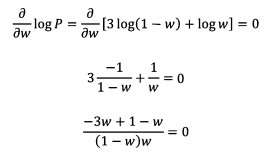

0 < w < 1 의 범위에서 답을 생각하면, 분모가 0 이 되지 않기 때문에 양변에 (1-w)w 를 곱하면 식 -4w + 1 = 0 이 된다. 따라서 w는 0.25 가 된다. 예상에 맞는 값이 나왔고, 가능성이 가장 높은 모델의 매개 변수는 w = 1/4 의 경우며, 최대 가능도가 된다. 하지만, 아직 완벽하지는 않다 x가 0.8~1.2 사이에 있을 때, 확률이 일정하다는 가정을 하고 있었기 때문이다.

# **6.1.4 로지스틱  회귀 모델**

여기까지 데이터를 균일한 분포에서 생성된 것으로 생각했다. 그 덕분에 계산하기 쉬운 계단식 분포였지만,실제 데이터가 균일하게 분포하는 경우는 거의 없다. 예를 들어, 몸무게와 키와의 차이는 가우스 함수 쪽이 실제 분포를 더 잘 표현할 수 있을 것이다. 따라서 질량의 데이터가 가우스 분포에 따른다고 가정하고 논의를 진행해보자. 가정의 근원인 조건부 확률 P(t=1|x) 는 로지스틱 회귀 모델로 나타낼 것을 배웠다. 로지스틱 회귀 모델은 아래 식과 같다.

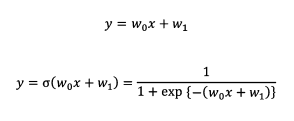

이렇게 한다고 하면, 직선 모델의 큰 양의 출력의 값은 1에 가까운 값이 되고, 절대값이 큰 음의 출력은 0에 가까운 값으로 변환되어 직선의 함수는 0과 1 사이의 범위내에 들어가게 된다.

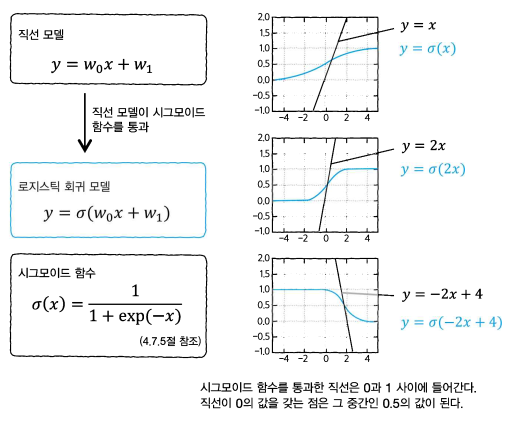

In [ ]:
def logistic(x, w):
 y = 1 / (1 + np.exp(-(w[0] * x + w[1])))
 return y

In [ ]:
def show_logistic(w):
  xb = np.linspace(X_min, X_max, 100)
  y = logistic(xb, w)
  plt.plot(xb, y, color = 'gray', linewidth = 4)
  i = np.min(np.where(y > 0.5))
  B = (xb[i-1] + xb[i]) / 2
  plt.plot([B, B], [-.5, 1.5], color = 'k', linestyle = '--')
  plt.grid(True)
  return B

1.25

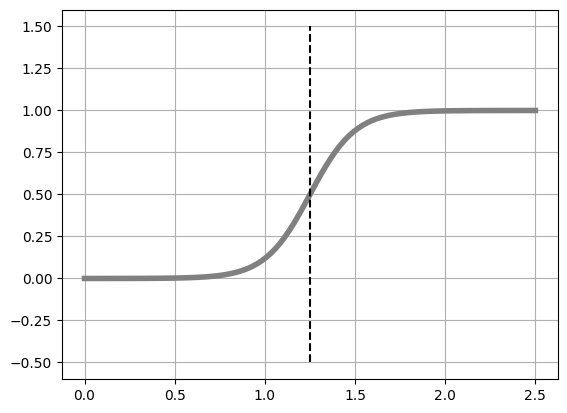

In [ ]:
W = [8, -10]
show_logistic(W)

결정 경계는 y = 0.5 가 되는 x의 값이다. y는 0.5를 넘은 직후의 요소 번호다. 그리고, 넘은 직후의 xb[i] 와 그 직전의 xb[i - 1]의 평균이 결정 경계의 근사치로서 B에 저장된다.

# **6.1.5 교차 엔트로피 오차**

로지스틱 회귀 모델을 통한 x가 t = 1 이 될 확률을 아래와 같이 나타낼 수 있다.

Screenshot from 2024-07-10 23-26-32.png

곤충의 데이터가 이 모델에서 생성된 확률, 가능도를 구한다. 데이터가 하나뿐이라고 가정하고 무게 x 에 대해 t = 1 이라면, t = 1이 모델에서 생성될 확률은 로지스틱 모델의 y 그 자체가 된다. 반대로 t = 0 이면, 1 - y 가 된다. 그래서 클래스의 생성확률을 $P(x|t) = y^t(1-y)^{1-t}$ 로 나타낼 수 있다. t = 1 인 경우는 다음 식과 같다. $P(t=1|x) = y^1(1-y)^{1-1} = y 가 된다.$  t = 0 의 경우에는 1-y 가 된다. 그러면 데이터가 N개라고 하면, 주어진 X 에 대한 클래스 T의 생성 확률은 어떻게 나타낼 수 있을까? 하나하나의 데이터 생성 확률을 모든 데이터에 곱하면 되기 때문에, 아래와 같다.

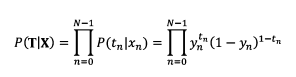

이에 로그를 넣어 로그 가능도를 구해보자.

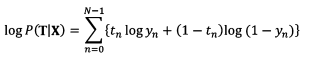

로그를 넣어 진수의 곱을 로그의 합으로 나타낼 수 있게 되었다. 이제 최소를 구하기 위해서는 -를 앞에 넣어주면 되는데,

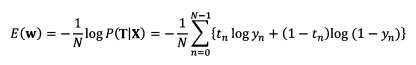

교차 엔트로피 오차라고 부른다. 이와 관련해 정보이론, MLE 함수 등이 있는데, 따로 정리하는 시간을 갖도록 하겠다.

In [ ]:
def cee_logistic(w, x, t):
    y = logistic(x, w)
    cee = 0
    for n in range(len(y)):
        cee = cee - (t[n] * np.log(y[n]) + (1 - t[n]) * np.log(1 - y[n]))
    cee = cee / X_n
    return cee


# test
W=[1,1]
cee_logistic(W, X, T)

1.0288191541851066

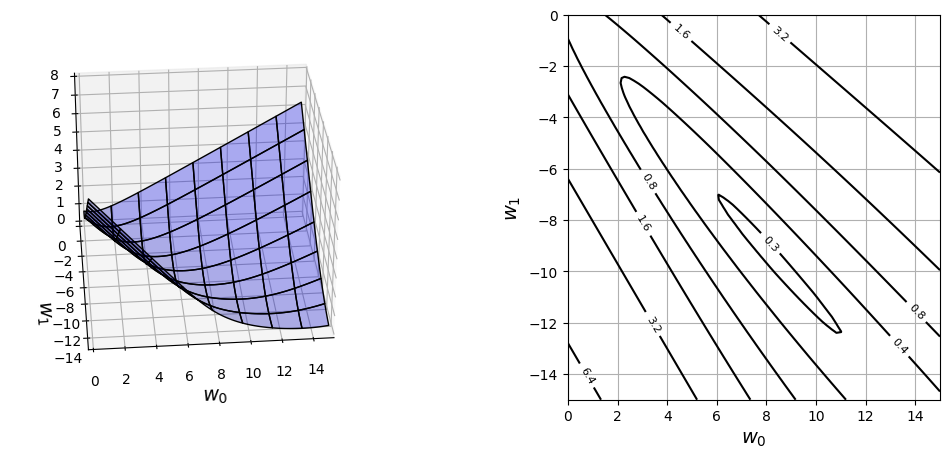

In [ ]:
from mpl_toolkits.mplot3d import Axes3D


xn = 80 # 등고선 표시 해상도
w_range = np.array([[0, 15], [-15, 0]])
x0 = np.linspace(w_range[0, 0], w_range[0, 1], xn)
x1 = np.linspace(w_range[1, 0], w_range[1, 1], xn)
xx0, xx1 = np.meshgrid(x0, x1)
C = np.zeros((len(x1), len(x0)))
w = np.zeros(2)
for i0 in range(xn):
    for i1 in range(xn):
        w[0] = x0[i0]
        w[1] = x1[i1]
        C[i1, i0] = cee_logistic(w, X, T)

plt.figure(figsize=(12, 5))
#plt.figure(figsize=(9.5, 4))
plt.subplots_adjust(wspace=0.5)
ax = plt.subplot(1, 2, 1, projection='3d')
ax.plot_surface(xx0, xx1, C, color='blue', edgecolor='black',
                rstride=10, cstride=10, alpha=0.3)
ax.set_xlabel('$w_0$', fontsize=14)
ax.set_ylabel('$w_1$', fontsize=14)
ax.set_xlim(0, 15)
ax.set_ylim(-15, 0)
ax.set_zlim(0, 8)
ax.view_init(30, -95)


plt.subplot(1, 2, 2)
cont = plt.contour(xx0, xx1, C, 20, colors='black',
                   levels=[0.26, 0.4, 0.8, 1.6, 3.2, 6.4])
cont.clabel(fmt='%1.1f', fontsize=8)
plt.xlabel('$w_0$', fontsize=14)
plt.ylabel('$w_1$', fontsize=14)
plt.grid(True)
plt.show()

오른쪽 등고선을 보면 최소치는 9, -9 사이 어딘가에 있을 것이다.

# **6.1.6 학습 규칙의 도출**

교차 엔트로피의 오차를 최소화하는 매개 변수의 분석해는 구할 수 없다. 이유는 $y_n$이 비선형의 시그모이드 함수를 포함하고 있기 때문이다. 그래서, 지금까지와 같은 경사하강법을 통해 구해보고자 한다. 평균 교차 엔트로피 오차 E(w) 를 $w_0$ 로 편미분한 것을 찾아봅니다.

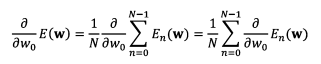

미분과 합은 다음과 같이 교환할 수 있고, 이때 $E_n(w)$ 는 아래 식과 같다.

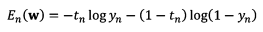

$y_n$ 은 시그모이드 함수를 돌린 결과값이 되는 것을 알 수 있고, 그렇기에, $w_0x_n + w_1 을 a_n으로\, 표기한다고\, 하면,$ 아래와 같이 나타낼 수 있다.

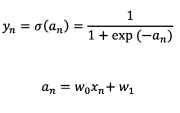

그러면 $E_n(w)$ 는 $E_n(y_n(a_n(w)))$ 로 중첩된 함수로 해석할 수 있기 때문에, $w_0$ 로 편미분하기 위해 연쇄 법칙을 이용한다.

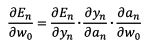

직렬 중첩임으로, 아주 간단한 식이 나타난다. 자 이제 미분을 시도해보면, 그 결과는 아래와 같은 식이 나오게 된다.

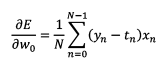

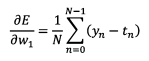

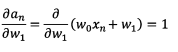

결론적으로 세번째 편미분 부분은 바로 위에 식 처럼 될 때를 제외하면 $w_0$ 와 동일하다.

In [ ]:
def dcee_logistic(w, x, t):
    y = logistic(x, w)
    dcee = np.zeros(2)
    for n in range(len(y)):
        dcee[0] = dcee[0] + (y[n] - t[n]) * x[n]
        dcee[1] = dcee[1] + (y[n] - t[n])
    dcee = dcee / X_n
    return dcee


# --- test
W=[1, 1]
dcee_logistic(W, X, T)

array([0.30857905, 0.39485474])

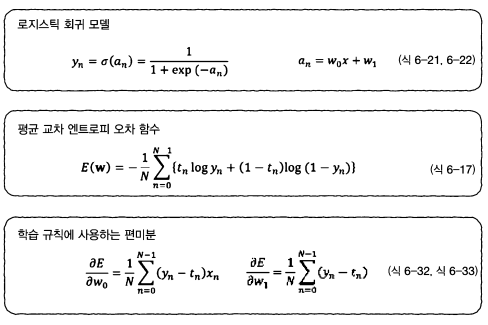

# **6.1.7 경사 하강법에 의한 해**

경사 하강법으로 로지스틱 회귀 모델의 매개변수를 찾아보자.  scipy.optimize 에 minimize() 로 경사하강법을 시도한다.

w0 = 8.18, w1 = -9.38
CEE = 0.25
Boundary = 1.15 g


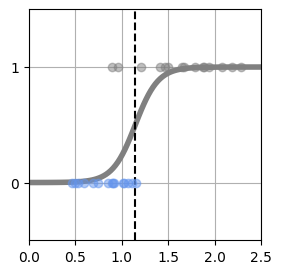

In [ ]:
from scipy.optimize import minimize


# 매개 변수 검색
def fit_logistic(w_init, x, t):
    res1 = minimize(cee_logistic, w_init, args=(x, t),
                    jac=dcee_logistic, method="CG") # 켤레 기울기 법
    return res1.x


# 메인 ------------------------------------
plt.figure(1, figsize=(3, 3))
W_init=[1,-1]
W = fit_logistic(W_init, X, T)
print("w0 = {0:.2f}, w1 = {1:.2f}".format(W[0], W[1]))
B=show_logistic(W)
show_data1(X, T)
plt.ylim(-.5, 1.5)
plt.xlim(X_min, X_max)
cee = cee_logistic(W, X, T)
print("CEE = {0:.2f}".format(cee))
print("Boundary = {0:.2f} g".format(B))
plt.show()

# **6.2 2차원 입력 2차원 분류**

입력 데이터가 2차원인 경우로 확장해보자.

# **6.2.1 문제 설정**

데이터를 재설정 하여 2차원 입력 데이터로 새로 만들자. 다음 명령을 실행시 정말 재설정해도 좋은지 확인 메시지가 나오는데, 이 명령은 현재 notebook에 정의된 모든 객체에 대한 정보를 지우는 역할을 한다.

In [ ]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [ ]:
from io import IncrementalNewlineDecoder
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(seed = 1) # 시드 설정
N = 100
K = 3
T3 = np.zeros((N, 3), dtype = np.uint8)
T2 = np.zeros((N, 2), dtype = np.uint8)
X = np.zeros((N, 2))

X_range0 = [-3, 3]
X_range1 = [-3, 3]
Mu = np.array([[-.5, -.5], [.5, 1.0], [1, -.5]]) #평균, 분포의 중심이 될 것.
Sig = np.array([[.7, .7], [.8, .3], [.3, .8]]) #분포의 분산 값
Pi = np.array([0.4, 0.8, 1])
for n in range(N):
  wk = np.random.rand()
  for k in range(K):
    if wk < Pi[k]:
      T3[n, k] = 1
      break
  for k in range(2):
    X[n, k] = (np.random.randn() * Sig[T3[n, :] == 1, k] + Mu[T3[n, :] == 1, k]) #randn 으로 해야 정규분포에서 random 값을 추출한다.

T2[:, 0] = T3[:, 0]
T2[:, 1] = T3[:, 1] | T3[:, 2]

<ipython-input-11-8b77dbcd3582>:25: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X[n, k] = (np.random.randn() * Sig[T3[n, :] == 1, k] + Mu[T3[n, :] == 1, k]) #randn 으로 해야 정규분포에서 random 값을 추출한다.


데이터의 총 갯수는 N = 100으로, 입력 데이터는 N x 2 의 X 반면 2클래스 분류의 클래스 데이터는 N x 2 T2에 3클래스 분류는 T3에 저장된다.

In [ ]:
print(X[:5, :])

[[-0.14173827  0.86533666]
 [-0.86972023 -1.25107804]
 [-2.15442802  0.29474174]
 [ 0.75523128  0.92518889]
 [-1.10193462  0.74082534]]


In [ ]:
print(T2[:5, :])

[[0 1]
 [1 0]
 [1 0]
 [0 1]
 [1 0]]


In [ ]:
print(T3[:5, :])

[[0 1 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [1 0 0]]


이처럼 목적 변수 벡터 $t_n$ 의 k번째 요소만 1로, 그 외에는 0으로 표기하는 방법을 1-of-K 부호화 라고 한다. one-hot-encoding 이랑 같은 말이다.

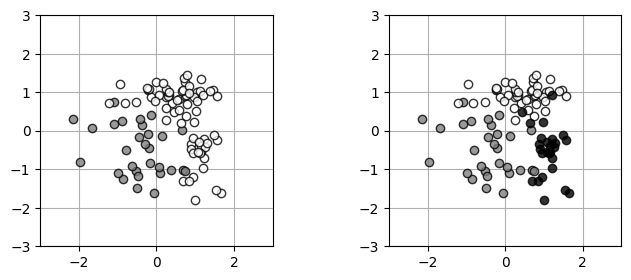

In [ ]:
def show_data2(x, t):
    wk, K = t.shape
    c = [[.5, .5, .5], [1, 1, 1], [0, 0, 0]]
    for k in range(K):
        plt.plot(x[t[:, k] == 1, 0], x[t[:, k] == 1, 1],
                 linestyle='none', markeredgecolor='black',
                 marker='o', color=c[k], alpha=0.8)
        plt.grid(True)


# 메인 ------------------------------
plt.figure(figsize=(7.5, 3))
plt.subplots_adjust(wspace=0.5)
plt.subplot(1, 2, 1)
show_data2(X, T2)
plt.xlim(X_range0)
plt.ylim(X_range1)


plt.subplot(1, 2, 2)
show_data2(X, T3)
plt.xlim(X_range0)
plt.ylim(X_range1)
plt.show()

클래스 2개로 나눈 것이 왼쪽 클래스 3개로 나눈 것이 오른쪽이다.

# **6.2.2 로지스틱 회귀 모델**

로지스틱 회귀 모델은 간단히 2차원 입력 으로 바꿀 수 있고 입력의 총합은 아래와 같다.

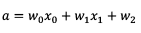

이번 모델의 출력은 클래스가 0인 확률을 근사하는 것으로 하자. 모델의 매개 변수가 하나 증가해 $w_0, w_1, w_2$ 이렇게 세가지가 된다.

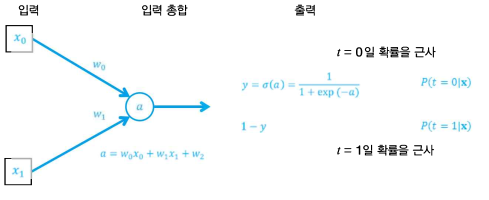

In [ ]:
def logistic2(x0, x1, w):
  y = 1 / (1 + np.exp(-(w[0] * x0 + w[1] * x1 + w[2])))
  return y

W = [-1, -1, -1] 인 경우의 2차원 로지스틱 회귀 모델과 데이터를 3차원으로 표시한다.

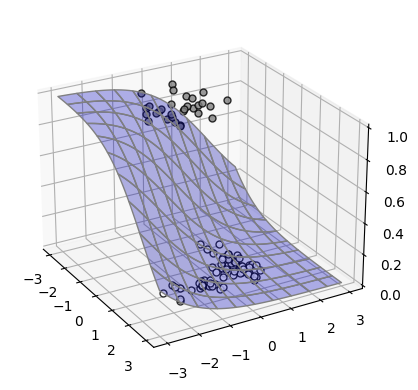

In [ ]:
from mpl_toolkits.mplot3d import axes3d

def show3d_logistic2(ax, w):
  xn = 50
  x0 = np.linspace(X_range0[0], X_range0[1], xn)
  x1 = np.linspace(X_range1[0], X_range1[1], xn)
  xx0, xx1 = np.meshgrid(x0, x1)
  y = logistic2(xx0, xx1, w)
  ax.plot_surface(xx0, xx1, y, color = 'blue', edgecolor = 'gray', rstride = 5, cstride = 5, alpha = 0.3)

def show_data2_3d(ax, x, t):
  c = [[.5, .5, .5], [1, 1, 1]]
  for i in range(2):
    ax.plot(x[t[:, i] == 1, 0], x[t[:, i] == 1, 1], 1 - i, marker = 'o', color = c[i], markeredgecolor = 'black', linestyle = 'none', markersize = 5, alpha = 0.8)

  Ax.view_init(elev = 25, azim = -30)

Ax = plt.subplot(1, 1, 1, projection = '3d')
W = [-1, -1, -1]
show3d_logistic2(Ax, W)
show_data2_3d(Ax, X, T2)

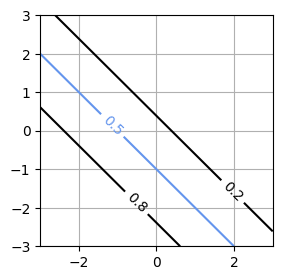

In [ ]:
def show_contour_logistic2(w):
  xn = 30
  x0 = np.linspace(X_range0[0], X_range0[1], xn)
  x1 = np.linspace(X_range1[0], X_range1[1], xn)
  xx0, xx1 = np.meshgrid(x0, x1)
  y = logistic2(xx0, xx1, w)
  cont = plt.contour(xx0, xx1, y, levels = (0.2, 0.5, 0.8), colors = ['k', 'cornflowerblue', 'k'])
  cont.clabel(fmt = '%1.1f', fontsize = 10)
  plt.grid(True)


plt.figure(figsize = (3, 3))
W = [-1, -1, -1]
show_contour_logistic2(W)

모델의 평균 교차 엔트로피 오차 함수는 아래와 같은 식을 사용하겠다.

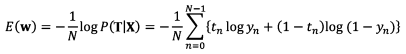

데이터에 1-of-K 부호화를 사용하기 때문에, 2클래스 분류 문제에 T의 0열 째를 $t_n$ 으로 두고 1이면 클래스 0, 0이면 클래스 1로 앞절과 같이 사용할 수 있다.

In [ ]:
def cee_logistic2(w, x, t):
  X_n = x.shape[0]
  y = logistic2(x[:, 0], x[:, 1], w)
  cee = 0
  for n in range(len(y)):
    cee = cee - (t[n, 0] * np.log(y[n]) + (1 - t[n, 0]) * np.log(1 - y[n]))

  cee = cee / X_n
  return cee

우리는 편미분을 직접 한 값을 넣어서 사용해줄것이다.

In [ ]:
def dcee_logistic2(w, x, t):
  X_n = x.shape[0]
  y = logistic2(x[:, 0], x[:, 1], w)
  dcee = np.zeros(3)
  for n in range(len(y)):
    dcee[0] = dcee[0] + (y[n] - t[n, 0]) * x[n, 0]
    dcee[1] = dcee[1] + (y[n] - t[n, 0]) * x[n, 1]
    dcee[2] = dcee[2] + (y[n] - t[n, 0])

  dcee = dcee / X_n
  return dcee

In [ ]:
#test
W = [-1, -1, -1]
dcee_logistic2(W, X, T2)

array([ 0.10272008,  0.04450983, -0.06307245])

이제 평균 교차 엔트로피 오차가 최소가 되도록 하는 로지스틱 회귀 모델의 매개 변수를 구하고 결과를 표시한다.

w0 = -3.70, w1 = -2.54, w2 = -0.28
CEE = 0.22


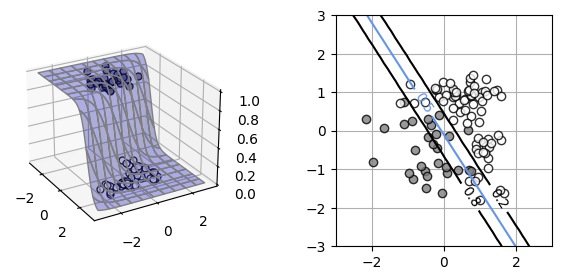

In [ ]:
from scipy.optimize import minimize


# 로지스틱 회귀 모델의 매개 변수 검색 -
def fit_logistic2(w_init, x, t):
    res = minimize(cee_logistic2, w_init, args=(x, t), jac=dcee_logistic2, method="CG")
    return res.x


plt.figure(1, figsize=(7, 3))
plt.subplots_adjust(wspace=0.5)


Ax = plt.subplot(1, 2, 1, projection='3d')
W_init = [-1, 0, 0]
W = fit_logistic2(W_init, X, T2)
print("w0 = {0:.2f}, w1 = {1:.2f}, w2 = {2:.2f}".format(W[0], W[1], W[2]))
show3d_logistic2(Ax, W)


show_data2_3d(Ax, X, T2)
cee = cee_logistic2(W, X, T2)
print("CEE = {0:.2f}".format(cee))


Ax = plt.subplot(1, 2, 2)
show_data2(X, T2)
show_contour_logistic2(W)
plt.show()

앞 절처럼 minimize() 에 미분 함수도 전달하여, 켤레 기울기법으로 매개 변수를 구했다. 그 결과가 위의 그림과 같다. 당연히 변수가 2차원 입력이기 때문에, 그 결과도 sigmoid의 면 형태의 값들이 나타났다. 이 모델의 결정 경계는 반드시 직선이 될 것이다.

# **6.3 2차원 입력의 3클래스 분류**

# **6.3.1 3클래스 분류 로지스틱 회귀 모델**

softmax() 함수의 이용을 통해 3클래스 이상의 클래스 분류 문제를 푸는 것이 가능하다. 예를 들어 3클래스의 분류 문제의 경우 3개의 클래스에 대응하는 입력 총합을 고려한다.

Screenshot from 2024-07-11 11-13-31.png

항사 1의 값을 갖는 세 번째 입력 $x_2 = 1$ 을 가정하면 식을 아래와 같이 나타낼 수 있다.

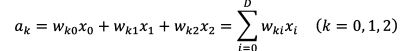

In [ ]:
def logistic3(x0, x1, w):
  K = 3
  w = w.reshape((3, 3))
  n = len(x1)
  y = np.zeros((n, K))
  for k in range(K):
    y[:, k] = np.exp(w[k, 0] * x0 + w[k, 1] * x1 + w[k, 2])
  wk = np.sum(y, axis = 1)
  wk = y.T / wk
  y = wk.T
  return y

In [ ]:
W = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])
y = logistic3(X[:3, 0], X[:3, 1], W)
print(np.round(y, 3))

[[0.    0.006 0.994]
 [0.965 0.033 0.001]
 [0.925 0.07  0.005]]


# **6.3.2 교차 엔트로피 오차**

가능도는 모든 입력 데이터에 대해 전체 클래스 데이터 T가 생성된 확률이다. 한 입력 데이터 x에 주목하여 그 클래스가 T = [1, 0, 0] 인 경우, 그 클래스의 생성 확률은 아래와 같다.

Screenshot from 2024-07-11 11-23-13.png

위의 예시와 같이 모든 Class 에 대해 확률 값을 계산하려면, 일반적인 식으로 만들어야 하는데, 그 결과는 아래와 같다.

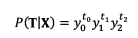

이렇게 나타내어서, 클래스 T = [t0, t1, t2] = [0, 1, 0] 이면, 아래 식과 같이 뽑아 낼 수 있다.

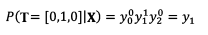

즉 N개의 데이터가 생성된 확률은 각 확률을 모든 데이터에 대해 곱하면 되고 아래와 같아진다.

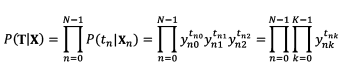

평균 교차 엔트로피 오차 함수는 가능도의 음의 대수의 평균이기 때문에, 아래와 같이 나타낼 수 있다.

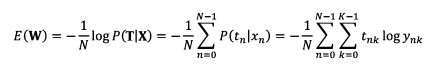

In [ ]:
def cee_logistic3(w, x, t):
    X_n = x.shape[0]
    y = logistic3(x[:, 0], x[:, 1], w)
    cee = 0
    N, K = y.shape
    for n in range(N):
        for k in range(K):
            cee = cee - (t[n, k] * np.log(y[n, k]))
    cee = cee / X_n
    return cee


# test ----
W = np.array([1, 2, 3, 4 ,5, 6, 7, 8, 9])
cee_logistic3(W, X, T3)

3.9824582404787288

# **6.3.3 경사 하강법에 의한 해**

경사 하강법으로 E(W) 를 최소화하는 W를 구하려면 $w_{ki}$ 에 대한 편미분이 필요하기 때문에, 아래와 같은 간단한 상태가 나온다.

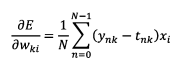

In [ ]:
def dcee_logistic3(w, x, t):
    X_n = x.shape[0]
    y = logistic3(x[:, 0], x[:, 1], w)
    dcee = np.zeros((3, 3)) # (클래스의 수 K) x (x의 차원 D+1)
    N, K = y.shape
    for n in range(N):
        for k in range(K):
            dcee[k, :] = dcee[k, :] - (t[n, k] - y[n, k])* np.r_[x[n, :], 1]
    dcee = dcee / X_n
    return dcee.reshape(-1)


# test ----
W = np.array([1, 2, 3, 4 ,5, 6, 7, 8, 9])
dcee_logistic3(W, X, T3)

array([ 0.03778433,  0.03708109, -0.1841851 , -0.21235188, -0.44408101,
       -0.38340835,  0.17456754,  0.40699992,  0.56759346])

In [ ]:
def fit_logistic3(w_init, x, t):
    res = minimize(cee_logistic3, w_init, args=(x, t), jac=dcee_logistic3, method="CG")
    return res.x

In [ ]:
def show_contour_logistic3(w):
    xn = 30 # 파라미터의 분할 수
    x0 = np.linspace(X_range0[0], X_range0[1], xn)
    x1 = np.linspace(X_range1[0], X_range1[1], xn)


    xx0, xx1 = np.meshgrid(x0, x1)

    y = np.zeros((xn, xn, 3))
    for i in range(xn):
        wk = logistic3(xx0[:, i], xx1[:, i], w)
        for j in range(3):
            y[:, i, j] = wk[:, j]
    for j in range(3):
        cont = plt.contour(xx0, xx1, y[:, :, j],
                           levels=(0.5, 0.9),
                           colors=['cornflowerblue', 'k'])
        cont.clabel(fmt='%1.1f', fontsize=9)
    plt.grid(True)

[[-3.2  -2.69  2.25]
 [-0.49  4.8  -0.69]
 [ 3.68 -2.11 -1.56]]
CEE = 0.23


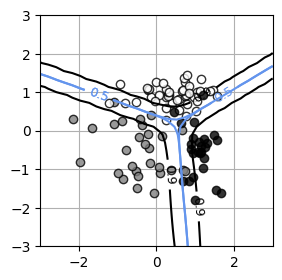

In [ ]:
W_init = np.zeros((3, 3)).reshape(-1)
W = fit_logistic3(W_init, X, T3)
print(np.round(W.reshape((3, 3)),2))
cee = cee_logistic3(W, X, T3)
print("CEE = {0:.2f}".format(cee))


plt.figure(figsize=(3, 3))
show_data2(X, T3)
show_contour_logistic3(W)
plt.show()